# Indoor (rectangles) Dataset Maker D
## PhD Research  

**Xiaoshi Wang**<br/>
**12/15/2022**<br/>

<hr style="height:2pt">

In [1]:
#RUN THIS CELL
import os
import pathlib
import random
import matplotlib.pyplot as plt
import time
import shutil
import pathlib
import csv
import time
import glob
working_dir = pathlib.Path().absolute()
os.chdir(working_dir)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.interpolate import griddata

from matplotlib import pyplot
import matplotlib.pylab as plt 
%matplotlib inline

In [3]:
def create_mag_cfd_matrix(cfd_matrix):
    mag_matrix = np.square(cfd_matrix[:,:,:,0]) + np.square(cfd_matrix[:,:,:,1]) + np.square(cfd_matrix[:,:,:,2])
    mag_matrix = np.sqrt(mag_matrix)
    return np.expand_dims(mag_matrix, axis=-1)

In [4]:
root_path = "C:/Users/Xiaoshi/Dropbox/9_PhD_Semester_9/01_PhD_Research/02_Transfer_Learning/00_Data_Generator/CFD_result_data/"
delta = 0.25
n_xy = 32
n_z = 16
# indices = range(3000)
indices = [2636]
for iter_index in indices:
    for i in range(5): 
        box_index = iter_index*5+i
        dataB_path = root_path.replace("CFD_result_data", "Indoor_Dataset_B") + "indoor_iteration_" + str(box_index) + ".npz"
        dataB = np.load(dataB_path)
        bnd_mx, xyz_deltas, cfd_mx = dataB['arr_0'], dataB['arr_1'], dataB['arr_2']
        mag_mx = create_mag_cfd_matrix(cfd_mx)
        npz_mag_name = root_path.replace("CFD_result_data", "Indoor_Dataset_D/CFD_Mag_Dataset") + "indoor_mag_iteration_" + str(box_index) + ".npz"
        npz_high_name = root_path.replace("CFD_result_data", "Indoor_Dataset_D/Mag_High_Res_Dataset") + "indoor_mag_highres_iteration_" + str(box_index) + ".npz"
        np.savez_compressed(npz_mag_name, bnd_mx, xyz_deltas, mag_mx)
        np.savez_compressed(npz_high_name, bnd_mx, mag_mx, xyz_deltas, cfd_mx)
    print("data point " + str(iter_index) + " complete")

data point 2636 complete


In [8]:
root_path = "C:/Users/Xiaoshi/Dropbox/9_PhD_Semester_9/01_PhD_Research/02_Transfer_Learning/00_Data_Generator/CFD_result_data/"
box_index = 8000
mag_data_path = root_path.replace("CFD_result_data", "Indoor_Dataset_D/CFD_Mag_Dataset") + "indoor_mag_iteration_" + str(box_index) + ".npz"
high_data_path = root_path.replace("CFD_result_data", "Indoor_Dataset_D/Mag_High_Res_Dataset") + "indoor_mag_highres_iteration_" + str(box_index) + ".npz"
mdata = np.load(mag_data_path)
hdata = np.load(high_data_path)
mbnd_mx, mxyz_deltas, mag_cfd_mx = mdata['arr_0'], mdata['arr_1'], mdata['arr_2']
hbnd_mx, hm_cfd_mx, hxyz_deltas, high_cfd_mx= hdata['arr_0'], hdata['arr_1'], hdata['arr_2'], hdata['arr_3']
print("mag bnd shape     : ", mbnd_mx.shape)
print("mag delta shape   : ", mxyz_deltas.shape)
print("mag cfd shape     : ", mag_cfd_mx.shape)
print("")
print("high bnd shape    : ", hbnd_mx.shape)
print("high mag cfd shape: ", hm_cfd_mx.shape)
print("high delta shape  : ", hxyz_deltas.shape)
print("high cfd shape    : ", high_cfd_mx.shape)

mag bnd shape     :  (32, 32, 16, 5)
mag delta shape   :  (3,)
mag cfd shape     :  (32, 32, 16, 1)

high bnd shape    :  (32, 32, 16, 5)
high mag cfd shape:  (32, 32, 16, 1)
high delta shape  :  (3,)
high cfd shape    :  (32, 32, 16, 4)


dx:  0.2016129
dy:  0.18548387
dz:  0.2


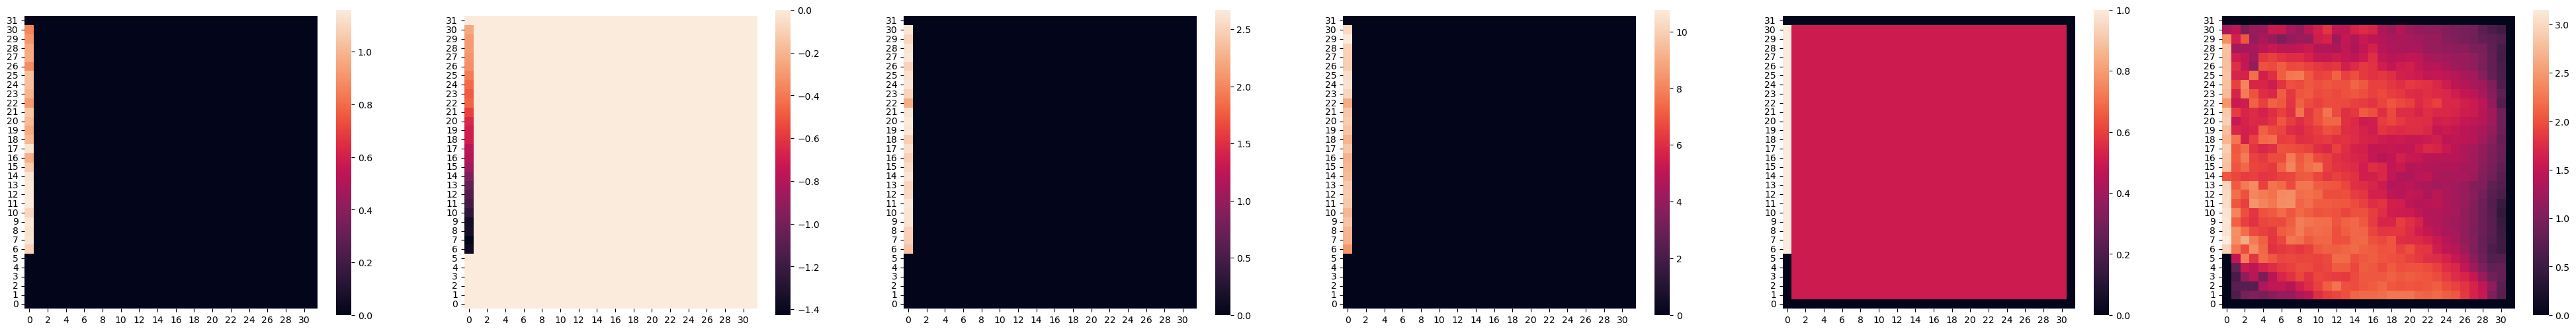

In [9]:
print("dx: ", mxyz_deltas[0])
print("dy: ", mxyz_deltas[1])
print("dz: ", mxyz_deltas[2])
zh = 14
ub, vb, wb, pb, patb, magc = mbnd_mx[:,:,:,0], mbnd_mx[:,:,:,1], mbnd_mx[:,:,:,2], mbnd_mx[:,:,:,3], mbnd_mx[:,:,:,4], mag_cfd_mx[:,:,:,0]

fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(50, 6))
sns.heatmap(ub[:,:,zh].T, ax = ax[0], square = True)
ax[0].invert_yaxis()
sns.heatmap(vb[:,:,zh].T, ax = ax[1], square = True)
ax[1].invert_yaxis()
sns.heatmap(wb[:,:,zh].T, ax = ax[2], square = True)
ax[2].invert_yaxis()
sns.heatmap(pb[:,:,zh].T, ax = ax[3], square = True)
ax[3].invert_yaxis()
sns.heatmap(patb[:,:,zh].T, ax = ax[4], square = True)
ax[4].invert_yaxis()
sns.heatmap(magc[:,:,zh].T, ax = ax[5], square = True)
ax[5].invert_yaxis()

dx:  0.2016129
dy:  0.18548387
dz:  0.2


(0.0, 1.0, 0.0, 1.0)

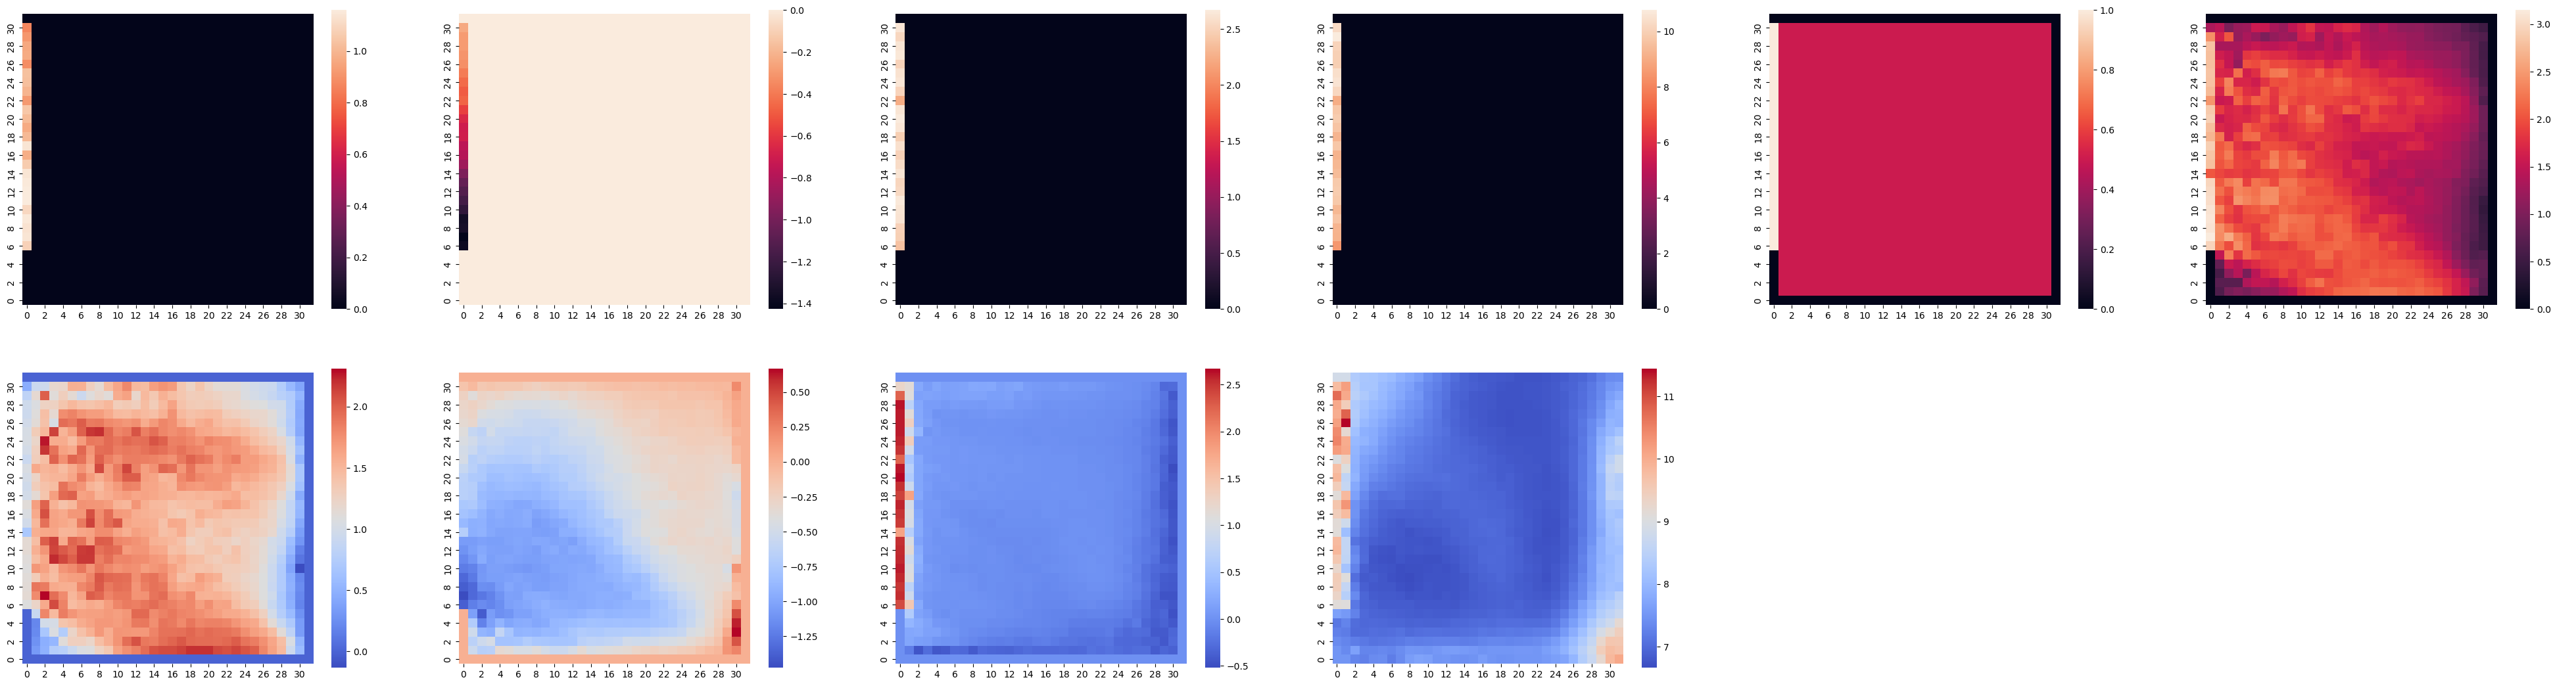

In [10]:
print("dx: ", hxyz_deltas[0])
print("dy: ", hxyz_deltas[1])
print("dz: ", hxyz_deltas[2])
zh = 14
ub, vb, wb, pb, patb, maghc = hbnd_mx[:,:,:,0], hbnd_mx[:,:,:,1], hbnd_mx[:,:,:,2], hbnd_mx[:,:,:,3], hbnd_mx[:,:,:,4], hm_cfd_mx[:,:,:,0]
uch, vch, wch, pch = high_cfd_mx[:,:,:,0], high_cfd_mx[:,:,:,1], high_cfd_mx[:,:,:,2], high_cfd_mx[:,:,:,3]

u_min, u_max = np.amin(uch[:,:,zh], axis=(0,1)), np.amax(uch[:,:,zh], axis=(0,1))
v_min, v_max = np.amin(vch[:,:,zh], axis=(0,1)), np.amax(vch[:,:,zh], axis=(0,1))
w_min, w_max = np.amin(wch[:,:,zh], axis=(0,1)), np.amax(wch[:,:,zh], axis=(0,1))
p_min, p_max = np.amin(pch[:,:,zh], axis=(0,1)), np.amax(pch[:,:,zh], axis=(0,1))

fig, ax = plt.subplots(nrows=2, ncols=6, figsize=(50, 13))
sns.heatmap(ub[:,:,zh].T, ax = ax[0,0], square = True)
ax[0,0].invert_yaxis()
sns.heatmap(vb[:,:,zh].T, ax = ax[0,1], square = True)
ax[0,1].invert_yaxis()
sns.heatmap(wb[:,:,zh].T, ax = ax[0,2], square = True)
ax[0,2].invert_yaxis()
sns.heatmap(pb[:,:,zh].T, ax = ax[0,3], square = True)
ax[0,3].invert_yaxis()
sns.heatmap(patb[:,:,zh].T, ax = ax[0,4], square = True)
ax[0,4].invert_yaxis()
sns.heatmap(maghc[:,:,zh].T, ax = ax[0,5], square = True)
ax[0,5].invert_yaxis()

sns.heatmap(uch[:,:,zh].T, ax = ax[1,0], square = True, cmap="coolwarm")
ax[1,0].invert_yaxis()s
sns.heatmap(vch[:,:,zh].T, ax = ax[1,1], square = True, cmap="coolwarm")
ax[1,1].invert_yaxis()
sns.heatmap(wch[:,:,zh].T, ax = ax[1,2], square = True, cmap="coolwarm")
ax[1,2].invert_yaxis()
sns.heatmap(pch[:,:,zh].T, ax = ax[1,3], square = True, cmap="coolwarm")
ax[1,3].invert_yaxis()
ax[1,4].axis('off')
ax[1,5].axis('off')